# 6단원. 이산형 확률분포


* 추측 통계의 목표: 한정된 표본으로부터 모집단의 평균, 분산을 추정


* **모수적 기법**: 이 때 모집단이 어떠한 성질일 것이므로 이러한 형태를 지닌 **확률분포**일 것이다라는 가정을 하고, 확률분포의 기댓값과 분산을 결정하는 파라미터를 추측
* **비모수적 기법**: 모집단의 확률분포에 어떠한 가정도 하지 않음


**<center>파라미터만 추측하면 되니까 추정이 간단하고 분석이 쉬운 모형을 만들 수 있다!</center>**


1. **다양한 확률분포, 특히 이산형 확률분포에 대해 소개**
2. **각각의 확률분포를 어떠한 상황에서 사용하는지 설명**


***

## 6.1. 베르누이 분포(Bernoulli distribution)


* 확률변수가 취할 수 있는 값이 **0과 1**밖에 없는 분포
* 1이 나오는 확률을 $p$, 0이 나오는 확률을 $1-p$
* 파라미터: $p$


$$
f(x)=
\begin{cases}
p^x (1-p)^{(1-x)} & (x \in \{0, 1\}) \\
0               & (otherwise)
\end{cases}
$$


* 기댓값과 분산


$$
E(X)=p
$$


$$
V(X)=p(1-p)
$$

In [1]:
import numpy as np


def Bern(p):
    x_set = np.array([0, 1])
    
    def f(x):
        if x in x_set:
            return p ** x * (1 - p) ** (1 - x)
        else:
            return 0
    
    return x_set, f

In [2]:
p = 0.3
X = Bern(p)

print(X)

(array([0, 1]), <function Bern.<locals>.f at 0x000001668F2BF1E0>)


In [3]:
def E(X):
    x_set, f = X
    
    return np.sum([x_k * f(x_k) for x_k in x_set])


def V(X):
    x_set, f = X
    
    mean = E(X)
    
    return np.sum([(x_k - mean) ** 2 * f(x_k) for x_k in x_set])


def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    assert np.all(prob >= 0), "minus probability" 
    # assert는 뒤의 조건이 참이 아니면 AssertError를 발생시킴
    # numpy.all() 배열의 모든 데이터가 조건과 맞으면 참, 하나라도 다르면 거짓
    
    prob_sum = np.round(np.sum(prob), 2)
    # Computation error 때문에 반올림해줘야 함!
    assert prob_sum == 1, f"sum of probability {prob_sum}"
    # f-문자열이 가독성 좋음
    
    print(f"expected value {E(X): .4}")
    print(f"variance {V(X): .4}")

In [4]:
check_prob(X)

expected value  0.3
variance  0.21


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FormatStrFormatter


fontPath = "./NanumGothic.ttf"
fontProp = fm.FontProperties(fname = fontPath)


def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize = (10, 5))
    ax  = fig.add_subplot(111)
    
    ax.bar(x_set, prob, color = "0.5", label = "확률")
    ax.vlines(E(X), 0, 1, label = "평균")
    
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("p(x)")
    ax.xaxis.set_major_formatter(FormatStrFormatter("%i"))
    ax.legend(prop = fontProp)
    ax.grid(True)
    
    plt.show()

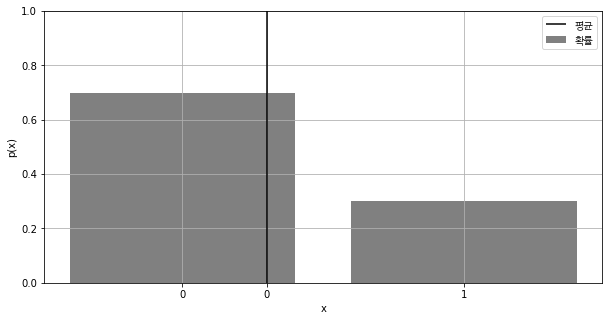

In [6]:
plot_prob(X)

expected value  0.5
variance  0.25


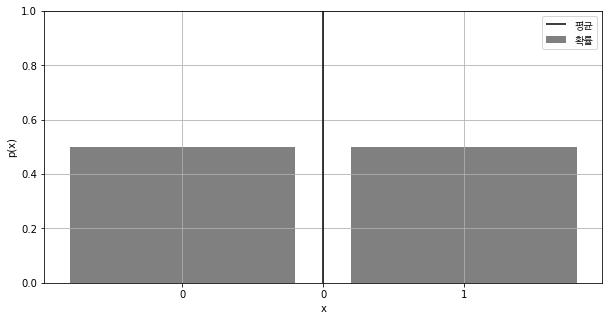

In [7]:
p = 0.5
X = Bern(p)

check_prob(X)
plot_prob(X)

expected value  0.7
variance  0.21


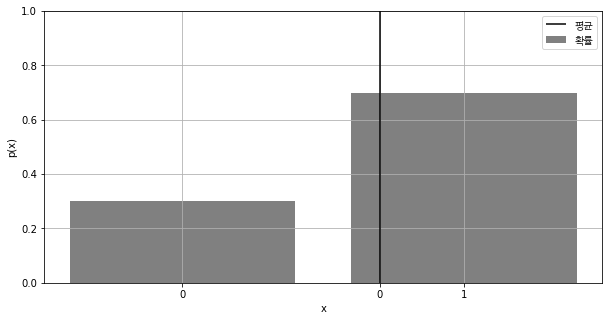

In [8]:
p = 0.7
X = Bern(p)

check_prob(X)
plot_prob(X)

## 6.2. 이항 분포(Binomial distribution)


* 성공 확률이 $p$인 베르누이 시행을 $n$번 했을 때의 **성공 횟수**가 따르는 분포
* 파라미터: 성공 확률 $p$, 시행 횟수 $n$


$$
f(x)=
\begin{cases}
{}_nC_x p^x (1-p)^{(n-x)} & (x \in \{0, 1, ..., n\}) \\
0               & (otherwise)
\end{cases}
$$


$$
{}_nC_x = {n! \over x!(n-x)!}
$$


* 기댓값과 분산


$$ E(X) = np$$


$$ V(X) = np(1-p)$$

In [9]:
from scipy.special import comb


def Bin(n, p):
    x_set = np.arange(n + 1)
    
    def f(x):
        if x in x_set:
            return comb(n, x) * p ** x * (1 - p) ** (n - x)
        
        else:
            return 0
    
    return x_set, f

In [10]:
n = 10
p = 0.3
X = Bin(n, p)

print(X)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), <function Bin.<locals>.f at 0x000001669066F510>)


In [11]:
check_prob(X)

expected value  3.0
variance  2.1


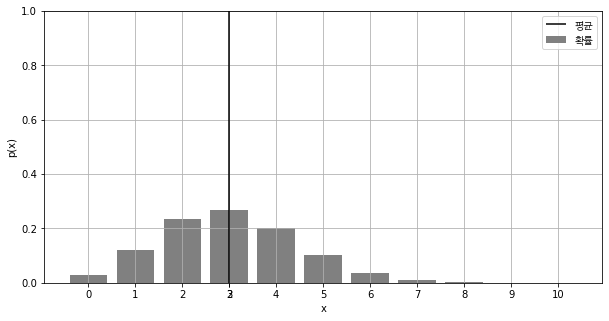

In [12]:
plot_prob(X)

expected value  5.0
variance  2.5


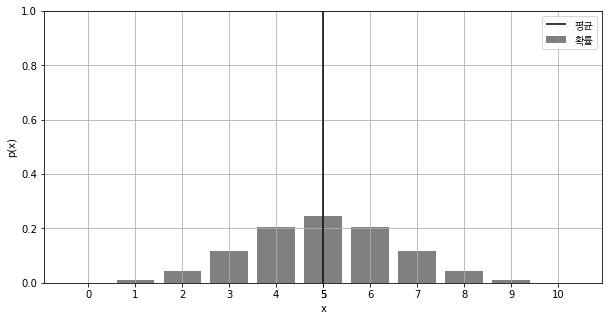

In [13]:
n = 10
p = 0.5
X = Bin(n, p)

check_prob(X)

plot_prob(X)

expected value  7.0
variance  2.1


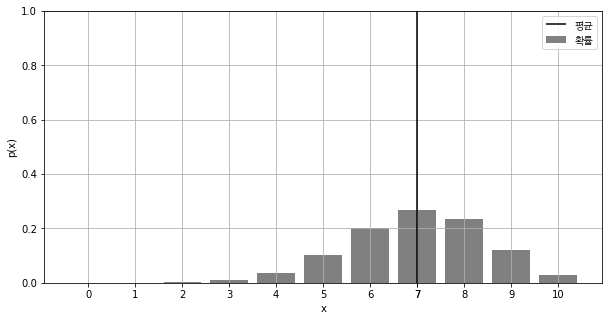

In [14]:
n = 10
p = 0.7
X = Bin(n, p)

check_prob(X)

plot_prob(X)

## 6.3. 기하 분포(Geometric distribution)


* 베르누이 시행에서 **처음 성공할 때까지 반복한 시행 횟수**가 따르는 분포
* 파라미터: 성공 확률 $p$


$$
f(x)=
\begin{cases}
(1-p)^{(x-1)}p & (x \in \{1, 2, 3, ...\}) \\
0               & (otherwise)
\end{cases}
$$


* 기댓값과 분산


$$ E(X)={1 \over p}$$


$$ V(X)={(1-p) \over p^2}$$

In [15]:
def Ge(p):
    x_set = np.arange(1, 30)
    
    def f(x):
        if x in x_set:
            return (1 - p) ** (x - 1) * p
        
        else:
            return 0
    
    return x_set, f

In [16]:
p = 0.5
X = Ge(p)

print(X)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), <function Ge.<locals>.f at 0x00000166908B6048>)


In [17]:
check_prob(X)

expected value  2.0
variance  2.0


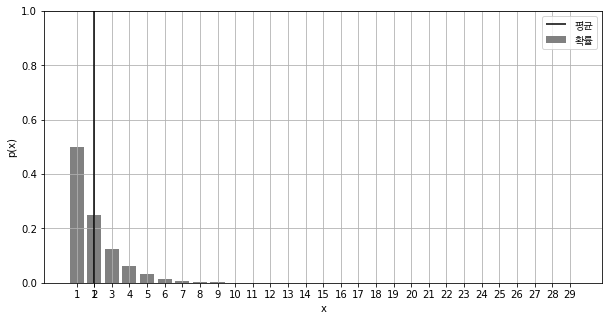

In [18]:
plot_prob(X)

expected value  4.947
variance  18.67


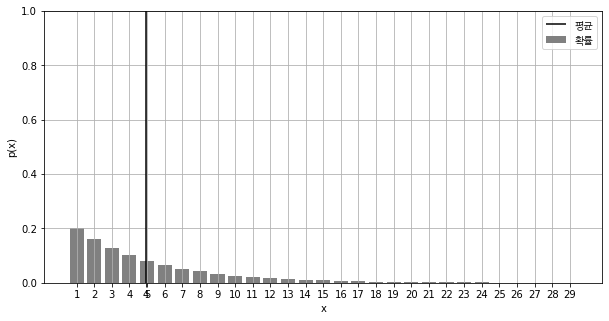

In [19]:
p = 0.2
X = Ge(p)

check_prob(X)
plot_prob(X)

## 6.4. 포아송 분포(Poisson distribution)


* 사건이 **단위 시간당 발생하는 건수**가 따르는 확률분포
* 파라미터: 평균 발생 건수 $\lambda$

In [20]:
from scipy.special import factorial


def Poi(lam):
    x_set = np.arange(20)
    
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        
        else:
            return 0
    
    return x_set, f

In [21]:
lam = 3
X = Poi(lam)

In [22]:
check_prob(X)

expected value  3.0
variance  3.0


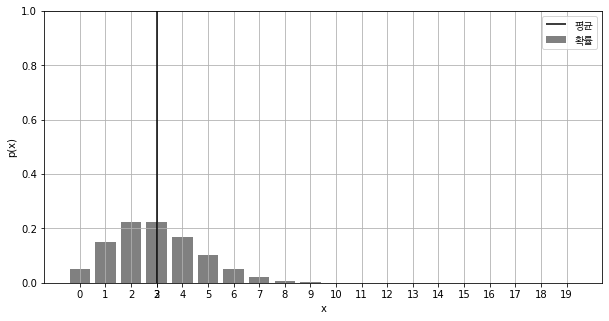

In [23]:
plot_prob(X)